<a href="https://colab.research.google.com/github/thihansas/ADS_graph_plotting/blob/main/TutorialC_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Handling and Visuialisation (7PAM2004) – Week 7 Tutorial

### Objectives:
+ Learn about plotting probability distributions
+ Learn about statistical tests with simulations
+ Make your own empirical cumulative distribution function
+ Make your own Kolmogorov-Smirnov test function in Python

### The online python documentation is a particularly useful resource that can help you with this tutorial
### https://numpy.org/doc/stable/user/index.html#user
### https://docs.scipy.org/doc/scipy/tutorial/index.html
### https://matplotlib.org/stable/users/index


### Part 1: The cumulative distribution function

The cumulative distribution function (CDF) is an alternative way to write a probability mass function (PMF) or a probability density function (PDF). The cumulative distribution $F(x)$ is the total of all probability of all outcomes with $x^\prime \leq x$.

If $p(x)$ is a probability density function for $x$, then the cumulative distribution can be calculated with an integral
$$
F(x) = \int_{-\infty}^x p(x^\prime)\mathrm{d}x^\prime.
$$

If instead we have a probability mass function $p_x$, then the integral becomes a sum.
$$
F(x) = \sum_{\mathrm{all}~x^\prime\leq x}p_x
$$

The code below shows the probability density function and CDF for a uniform distribtion between $a$ and $b$.

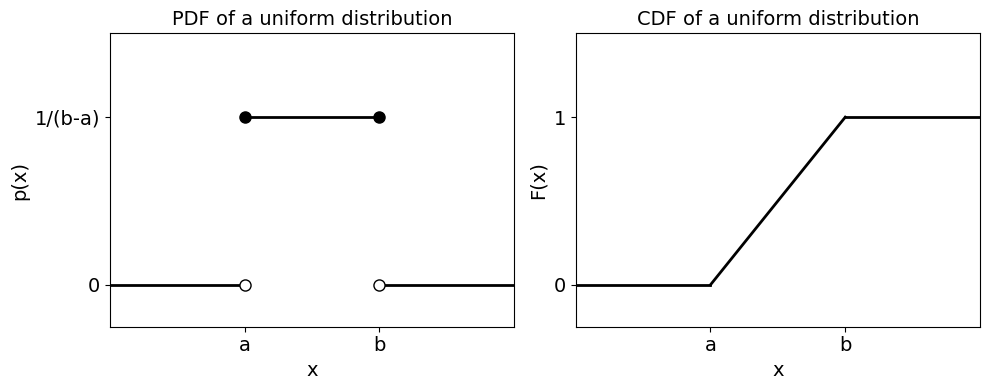

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Starting multiple plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

################
# Plot 1 – PDF #

# Lines indicating the density
ax1.plot([-5, 3], [0, 0], 'k-', linewidth=2)  # Line from (-5, 0) to (3, 0)
ax1.plot([3, 4], [1, 1], 'k-', linewidth=2)   # Line from (3, 1) to (4, 1)
ax1.plot([4, 7], [0, 0], 'k-', linewidth=2)   # Line from (2, 0) to (7, 0)

# Open circles indicate excluded endpoints
ax1.plot(3, 0, 'ko', mfc='white', markersize=8)  # Open circle at (3, 0)
ax1.plot(4, 0, 'ko', mfc='white', markersize=8)  # Open circle at (4, 0)

# Closed circles indicate included endpoints
ax1.plot(3, 1, 'ko', markersize=8)  # Closed circle at (3, 1)
ax1.plot(4, 1, 'ko', markersize=8)  # Closed circle at (4, 1)

# Set axis limits
ax1.set_xlim(2, 5)
ax1.set_ylim(-0.25, 1.5)

# Tic marks are labeled in a generic way
ax1.set_xticks([3, 4])
ax1.set_xticklabels(['a', 'b'], fontsize=14)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('p(x)',fontsize=14)
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['0', '1/(b-a)'], fontsize=14)

ax1.set_title("PDF of a uniform distribution", fontsize=14)

################
# Plot 2 – CDF #

# Lines indicating the density
ax2.plot([-5, 3], [0, 0], 'k-', linewidth=2)  # Line from (-5, 0) to (3, 0)
ax2.plot([3, 4], [0, 1], 'k-', linewidth=2)   # Line from (3, 1) to (4, 1)
ax2.plot([4, 7], [1, 1], 'k-', linewidth=2)   # Line from (2, 0) to (7, 0)

# Set axis limits
ax2.set_xlim(2, 5)
ax2.set_ylim(-0.25, 1.5)

# Tic marks are labeled in a generic way
ax2.set_xticks([3, 4])
ax2.set_xticklabels(['a', 'b'], fontsize=14)
ax2.set_xlabel('x',fontsize=14)

ax2.set_ylabel('F(x)',fontsize=14)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['0', '1'], fontsize=14)

ax2.set_title("CDF of a uniform distribution", fontsize=14)

plt.tight_layout()

Now, let's try to calculate the *empirical* cumulative distribution (ECDF) of a dataset.

For testing purposes, please create a dataset that is uniformly distributed between $x=1$ and $x=3$. This dataset should contain 100 points.

In [2]:
dataset = np.random.uniform(1, 3, 100)

# The length of x. (We know this will be 100.)
n = dataset.size

print(dataset)

[1.65591198 2.12228331 1.69023916 2.66090202 2.6094972  1.08209385
 1.15409277 1.21515205 2.13814889 1.51240674 2.43075413 2.30840566
 2.93097638 2.64522708 1.70174177 2.9322628  1.74642162 2.29301699
 1.6487384  2.92322595 1.26776619 1.1724446  2.93672106 2.15789319
 1.65782954 1.41579972 2.29362222 2.19930508 1.98326603 1.46733358
 1.13869812 1.3558078  1.41734506 2.15717849 1.34759289 1.69308106
 2.44421735 2.11940404 2.32924615 2.54508044 2.93448947 2.46038679
 1.92258426 2.93171405 1.51663342 1.10343449 1.99776749 1.24069646
 2.57681843 1.18890721 1.5543557  1.50736991 2.82961934 1.96952224
 2.62334613 1.07442852 2.90494111 1.84841923 2.70811002 2.28851759
 2.38648399 2.55110828 1.65960036 1.59875299 2.85992971 2.30158827
 1.99011979 2.57789572 1.54726505 1.53043472 1.11979136 2.40703123
 2.41023139 1.16527461 1.50962813 2.97133209 1.81320806 1.71828862
 2.45868711 2.28066826 1.99356929 2.1037251  2.09108516 2.6614804
 1.04367254 2.71258846 2.20448001 1.05006023 1.62204087 1.89852

To estimate the CDF, we need to count how many elements of the dataset are less than a given $x$.
$$
F(x) = \mathrm{number~of~elements~of~the~dataset~less~than~or~equal~to}~x
$$

This function will look like a step function. Here is an example ECDF with a dataset $x$ containing 10 values.

<img src="https://star.herts.ac.uk/~kuhn/DHV/ecdf_example.jpg" width="600">

For our dataset, how many steps do we expect to have? Where will these steps be located?

100

Plot a graph for our dataset looking like the ECDF above. The optimal strategy will use the np.sort() function.



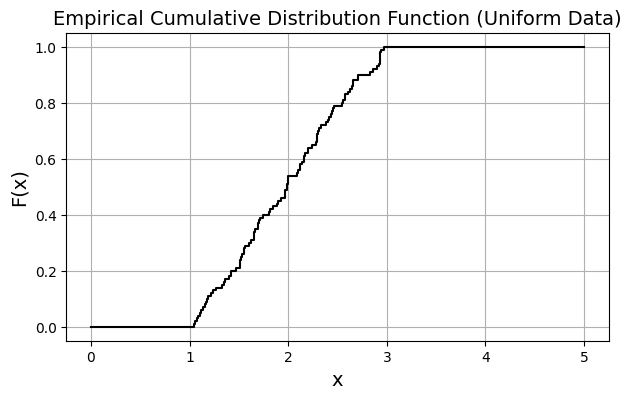

In [3]:
dataset_sorted = np.sort(dataset)
dataset_padded = np.concatenate(([0],dataset_sorted,[5])) # Extending the line to the left and right

F = np.arange(1, n + 1) / n
F_padded = np.concatenate(([0],F,[1])) # Extending the line to the left and right

fig, ax = plt.subplots(figsize=(7, 4))

# Plotting commands go here
ax.step(dataset_padded, F_padded, where='post', label='Empirical CDF', color='black')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('F(x)', fontsize=14)
ax.set_title('Empirical Cumulative Distribution Function (Uniform Data)', fontsize=14)
ax.grid(True)
plt.show()

What is the theoretical CDF line for the uniform distribution between $x=1$ and $x=3$?

F(x)= (x−1)/2 for 1≤x≤3.

Remake the plot from above, and add this theoretical line.

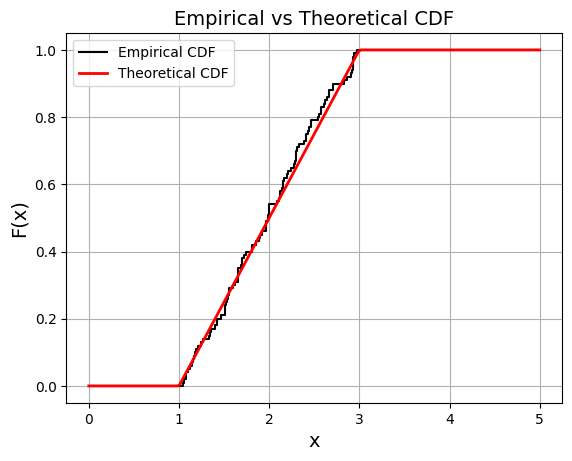

In [4]:
fig, ax = plt.subplots()

# Plotting commands go here
ax.step(dataset_padded, F_padded, where='post', color='black', label='Empirical CDF')

# Theoretical CDF
x_theo = np.linspace(0, 5, 200)
F_theo = np.piecewise(x_theo, [x_theo < 1, (x_theo >= 1) & (x_theo <= 3), x_theo > 3],
                      [0, lambda x: (x - 1)/2, 1])
ax.plot(x_theo, F_theo, 'r-', linewidth=2, label='Theoretical CDF')

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('F(x)', fontsize=14)
ax.set_title("Empirical vs Theoretical CDF", fontsize=14)
ax.legend()
ax.grid(True)
plt.show()

### Part 2: The Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov (K-S) test is a statistical hypothesis test to detect differences between two distributions.

In hypothesis tests, the test statistic is a measure of the difference between two distributions. We calculate this value, then determine whether it is "statistically significant."

Here, we will use the maximum vertical difference between the empirical CDF and the theoretical CDF as our test statistic. We will label this value $D$.

Please write a python function to calculate $D$, the difference between the empirical and theoretical CDFs from above. The function should take as input the dataset "dataset".

In [5]:
# You may want to use this area for scratch work

def calculate_D(dataset):
    dataset_sorted = np.sort(dataset)
    n = len(dataset_sorted)

    F_ecdf = np.arange(1, n+1) / n

    F_theoretical = (dataset_sorted - 1) / 2
    F_theoretical = np.clip(F_theoretical, 0, 1)

    D = np.max(np.abs(F_ecdf - F_theoretical))
    return D



We know that our dataset, "dataset", was drawn from the uniform distribution described above. Thus, deviations between our ECDF and the theoretical dataset should not be statistically significant.

We can use this knowledge to determine how much deviation is needed for a difference to be statistically significant.

Please write code to run your function from above 1000 times on 1000 different datasets. Save the results from each run in a numpy array.

In [6]:
n_sim = 1000
D_arr = np.zeros(n_sim)

for i in range(n_sim):
    dataset_sim = np.random.uniform(1, 3, 100)
    D_arr[i] = calculate_D(dataset_sim)

print("Min D:", D_arr.min())
print("Max D:", D_arr.max())


Min D: 0.02904366007849757
Max D: 0.20622370115855182


Make a histogram of these $D$ values.

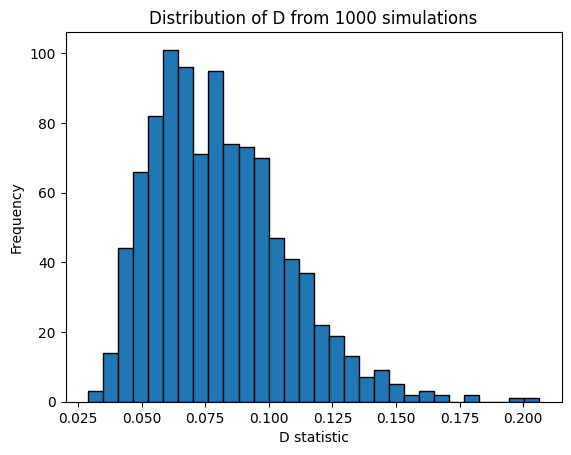

In [7]:
fig, ax = plt.subplots()
ax.hist(D_arr, bins=30, edgecolor='black')
ax.set_xlabel('D statistic')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of D from 1000 simulations')
plt.show()


Here's a new dataset of 100 points, with the same minimum and maximum values of 1 and 3, but we don't know if it is uniformly distributed. Write python code to calculate D for this dataset.

https://star.herts.ac.uk/~kuhn/DHV/testdat.csv

Do you think this new dataset follows a uniform distribution?

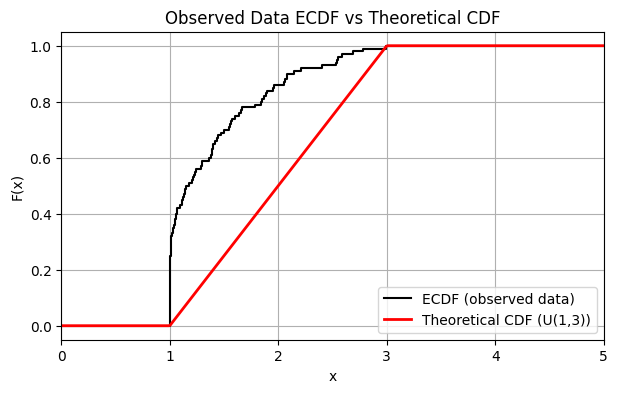

In [8]:
# Load dataset
data_observed = np.genfromtxt(
    'https://star.herts.ac.uk/~kuhn/DHV/testdat.csv',
    delimiter=',', skip_header=1
)

data_obs_sorted = np.sort(data_observed)
n_obs = len(data_obs_sorted)
F_obs = np.arange(1, n_obs+1) / n_obs
x_obs_padded = np.concatenate(([0], data_obs_sorted, [5]))
F_obs_padded = np.concatenate(([0], F_obs, [1]))

fig, ax = plt.subplots(figsize=(7,4))
ax.step(x_obs_padded, F_obs_padded, where='post', color='black', label='ECDF (observed data)')
x_theo = np.linspace(0,5,400)
F_theo = np.piecewise(x_theo,
                      [x_theo < 1, (x_theo >= 1) & (x_theo <= 3), x_theo > 3],
                      [0, lambda x: (x-1)/2, 1])

ax.plot(x_theo, F_theo, 'r-', linewidth=2, label='Theoretical CDF (U(1,3))')

ax.set_xlim(0, 5)
ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title("Observed Data ECDF vs Theoretical CDF")
ax.legend()
ax.grid(True)
plt.show()

